In [11]:
from perceptron import Perceptron  # our custom perceptron class
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np 

# load digits dataset
digits = load_digits()

X = digits.data  # 64 features (pixels of images)
y = digits.target  # labels (digits from 0 to 9)

# split the dataset (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [14]:
# dictionary to store perceptrons
perceptrons = {}
alpha = 0.1 # tried several to choose right model (0.01, 0.1, 1, 10)

# train perceptron for each digit (one-vs-all)
for digit in range(10):
    #print(f"Training perceptron for digit {digit}...")    
    # binary labels for current digit
    y_train_binary = np.where(y_train == digit, 1, -1)
    
    # initialize and train perceptron n° digit
    perceptron = Perceptron(alpha)
    perceptron.train(X_train, y_train_binary)
    
    # add trained perceptron to dictionary
    perceptrons[digit] = perceptron

In [15]:
# evaluate each perceptron on validation set
validation_results = np.zeros((X_val.shape[0], 10))

for digit, perceptron in perceptrons.items():
    y_val_binary = np.where(y_val == digit, 1, -1)
    predictions = perceptron.predict(X_val)
    validation_results[:, digit] = predictions

# choose final predictions based on perceptron with highest score
y_val_pred = np.argmax(validation_results, axis=1)

print("Validation Results:")
print(classification_report(y_val, y_val_pred))
print(f"Validation set accuracy: {accuracy_score(y_val, y_val_pred) * 100:.2f}%")

Validation Results:
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        29
           1       0.89      0.80      0.84        30
           2       0.96      0.96      0.96        26
           3       0.89      0.94      0.92        36
           4       1.00      0.97      0.99        39
           5       1.00      0.92      0.96        51
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        39
           8       0.88      0.81      0.85        27
           9       0.98      0.85      0.91        47

    accuracy                           0.92       359
   macro avg       0.92      0.92      0.92       359
weighted avg       0.94      0.92      0.93       359

Validation set accuracy: 92.48%


In [5]:
# evaluate perceptrons on test set
test_results = np.zeros((X_test.shape[0], 10))

for digit, perceptron in perceptrons.items():
    predictions = perceptron.predict(X_test)
    test_results[:, digit] = predictions

# final predictions
y_test_pred = np.argmax(test_results, axis=1)

print("Test Results:")
print(classification_report(y_test, y_test_pred))
print(f"Test set accuracy: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")

Test Results:
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        38
           1       0.83      0.83      0.83        42
           2       1.00      0.90      0.95        40
           3       0.91      0.89      0.90        35
           4       1.00      1.00      1.00        39
           5       0.94      0.94      0.94        32
           6       1.00      0.97      0.99        34
           7       1.00      0.91      0.95        32
           8       0.91      0.82      0.86        38
           9       0.95      0.67      0.78        30

    accuracy                           0.89       360
   macro avg       0.92      0.89      0.90       360
weighted avg       0.91      0.89      0.90       360

Test set accuracy: 89.44%


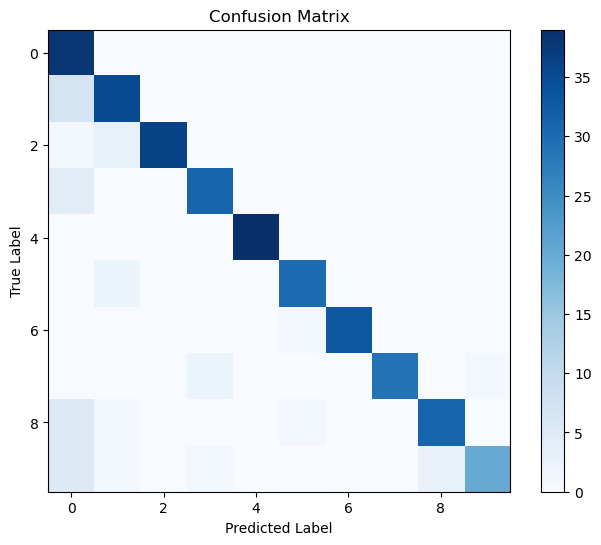

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()